# Implementing a Decomposition Method

For this recipe, we will implement a matrix decomposition method for linear regression. Specifically we will use the Cholesky decomposition, for which relevant functions exist in TensorFlow.

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
ops.reset_default_graph()
sess = tf.Session()

### Generating data

In [55]:
DATA_SIZE = 3000
x_vals = np.linspace(-24, 68, DATA_SIZE)
y_vals = -3.12 * x_vals + np.random.normal(loc=2.66, scale=9.1, size=DATA_SIZE)

print(x_vals[: 4])
print(y_vals[: 4])

[-24.         -23.96932311 -23.93864622 -23.90796932]
[ 73.65551256  80.79756395  59.81674622  78.29107843]


### Plotting data

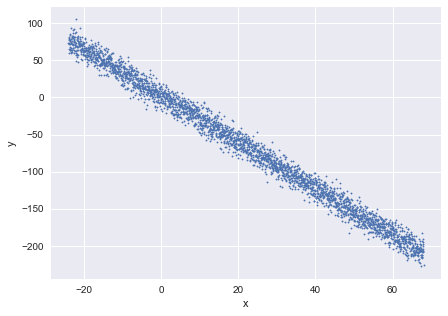

In [57]:
plt.figure(figsize=(7, 5))
plt.scatter(x_vals, y_vals, s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Creating matrices

In [58]:
ones = np.ones(shape=[DATA_SIZE, 1])
A_vals = np.column_stack((np.reshape(x_vals, newshape=[-1, 1]), ones))
B_vals = np.reshape(y_vals, newshape=[-1, 1])

print(A_vals.shape)
print(A_vals[: 4])

print(B_vals.shape)
print(B_vals[: 4])

(3000, 2)
[[-24.           1.        ]
 [-23.96932311   1.        ]
 [-23.93864622   1.        ]
 [-23.90796932   1.        ]]
(3000, 1)
[[ 73.65551256]
 [ 80.79756395]
 [ 59.81674622]
 [ 78.29107843]]


### Creating tensors

In [59]:
A = tf.constant(A_vals)
B = tf.constant(B_vals)

print(A)
print(B)

Tensor("Const_2:0", shape=(3000, 2), dtype=float64)
Tensor("Const_3:0", shape=(3000, 1), dtype=float64)


### Solving with decomposition method

In [60]:
def solve_decomposition(A, B):
    At = tf.transpose(A)
    At_A = tf.matmul(At, A)
    L = tf.cholesky(At_A)
    At_B = tf.matmul(At, B)
    L_At_B = tf.matrix_solve(L, At_B)
    solution = tf.matrix_solve(tf.transpose(L), L_At_B)
    return solution

In [61]:
def solve_matrix_inverse(A, B):
    At = tf.transpose(A)
    At_A = tf.matmul(tf.transpose(A), A)
    At_A_i = tf.matrix_inverse(At_A)
    At_A_i_At = tf.matmul(At_A_i, At)
    solution = tf.matmul(At_A_i_At, B)
    return solution

In [62]:
sol_dec = solve_decomposition(A, B)
print(sol_dec)
sess.run(sol_dec)

Tensor("MatrixSolve_7:0", shape=(2, 1), dtype=float64)


array([[-3.12410599],
       [ 2.51909734]])

In [63]:
sol_mi = solve_matrix_inverse(A, B)
print(sol_mi)
sess.run(sol_mi)

Tensor("MatMul_16:0", shape=(2, 1), dtype=float64)


array([[-3.12410599],
       [ 2.51909734]])

In [64]:
%timeit sess.run(sol_dec)

92.2 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [65]:
%timeit sess.run(sol_mi)

90.5 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Plotting results

In [35]:
res = tf.matmul(A, solution, name='res')
print(res)

Tensor("res:0", shape=(400, 1), dtype=float64)


In [36]:
res_vals = sess.run(res)

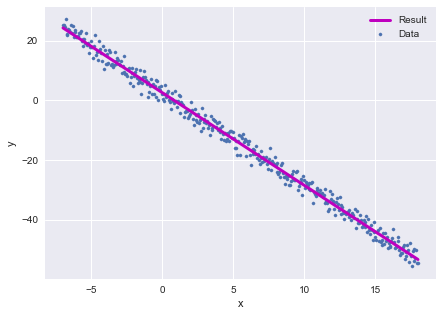

In [37]:
plt.figure(figsize=(7, 5))
plt.scatter(x_vals, y_vals, s=10, label='Data')
plt.plot(x_vals, res_vals, 'm-', linewidth=3, label='Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()